In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import scipy
from scipy import signal,stats
from scipy.fft import rfft,rfftfreq
from scipy import stats
from scipy.spatial.distance import cdist

import seaborn as sns
import pandas as pd
import sklearn
import seaborn as sns

from awear_function_lib import load_eeg_data, apply_filters, plot_psd, plot_ratios_bar, calculate_ratios
from awear_function_lib import plot_spectrogram, plot_band_ratios_spectrogram, plot_band_ratios_box_whisker, plot_band_ratio_heatmap, plot_avg_power_heatmap
from awear_function_lib import remove_outliers, compute_time_resolved_pac, compute_effect_sizes
from awear_function_lib import compute_sample_entropy, compute_approximate_entropy, compute_average_entropy, compute_anova_entropy, compute_pairwise_tests

import itertools
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests

# import importlib
# import awear_function_lib
# importlib.reload(awear_function_lib) 

In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 3 Antonio/Erotic_5.txt',
    '.../Subject 3 Antonio/Fear 2_1.txt',
    '.../Subject 3 Antonio/Scenery_2.txt',
    '.../Subject 3 Antonio/Sadness_7.txt'
    #'.../Subject 3 Antonio/Neutral_2.txt'
]
labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
    #"Neutral"
]

# Load EEG data with correct labels
antonio_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=labels, channel=0)  

# Delta/Beta (50,110)
# Delta/Gamma (62,122)
# Theta/Beta (50,110)
# Theta/Gamma (50,110)
# Alpha/Beta (50,110)
# Alpha/Gamma (35,95), (44,104)

antonio_ht = load_eeg_data(file_paths=file_paths[:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=labels, channel=0)  
antonio_hr = load_eeg_data(file_paths=file_paths[0:3:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=["Happy","Relaxed"], channel=0)  



print(antonio_data["Relaxed"].shape)
print(antonio_data["Tense"].shape)
#print(antonio_data["Neutral"].shape)

# Remove Outliers
antonio_data = remove_outliers(antonio_data)
antonio_ht = remove_outliers(antonio_ht)
antonio_hr = remove_outliers(antonio_hr)


(24000,)
(24000,)


In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 5 Ana/Happy_4.txt',
    '.../Subject 5 Ana/Tense_3.txt',
    '.../Subject 5 Ana/Relaxed_4.txt',
    '.../Subject 5 Ana/Sad_5.txt'
    #'.../Subject 5 Ana/Neutral_2.txt'
]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
    #"Neutral"
]

# Load EEG data with correct labels
ana_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(0,120)],  
                     fs=200, labels=labels, channel=0)  

# Delta/Beta (36,96)
# Delta/Gamma (53,113), (38,98)
# Theta/Beta (60,120)
# Theta/Gamma (45,105), (47,107)
# Alpha/Beta (57,117)
# Alpha/Gamma (56,116)

ana_ht = load_eeg_data(file_paths=file_paths[:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=labels, channel=0)  
ana_hr = load_eeg_data(file_paths=file_paths[0:3:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=["Happy","Relaxed"], channel=0)  



print(ana_data["Relaxed"].shape)
print(ana_data["Tense"].shape)
#print(ana_data["Neutral"].shape)

# Remove Outliers
ana_data = remove_outliers(ana_data)
ana_ht = remove_outliers(ana_ht)
ana_hr = remove_outliers(ana_hr)


(24000,)
(24000,)


In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 1 Ale/Erotic_3.txt',
    '.../Subject 1 Ale/Fear_2.txt',
    '.../Subject 1 Ale/Scenery_4.txt',
    '.../Subject 1 Ale/Sadness_2.txt'
    #'.../Subject 1 Ale/Neutral_2.txt'

]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad",
    #"Neutral"
]

# Load EEG data with correct labels
ale_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(0,110)], 
                     fs=200, labels=labels, channel=0)  

# Delta/Beta (51,111)/(54,114)
# Delta/Gamma (30,90)
# Theta/Beta (42,102),(54,114),(48,108)
# Theta/Gamma (8,68),(14,74), (38,98)
# Alpha/Beta (24,84),(22,82)
# Alpha/Gamma (36,96)


ale_ht = load_eeg_data(file_paths=file_paths[:2], data_type="openbci", 
                     segments=[(0,110)], 
                     fs=200, labels=labels, channel=0)  
ale_hr = load_eeg_data(file_paths=file_paths[0:3:2], data_type="openbci", 
                     segments=[(0,110)], 
                     fs=200, labels=["Happy","Relaxed"], channel=0)  



print(ale_data["Relaxed"].shape)
print(ale_data["Tense"].shape)
#print(ale_data["Neutral"].shape)

# Remove Outliers
ale_data = remove_outliers(ale_data)
ale_ht = remove_outliers(ale_ht)
ale_hr = remove_outliers(ale_hr)


(22000,)
(22000,)


In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 2 Jenny/Erotic_2.txt',
    '.../Subject 2 Jenny/Fear2_2.txt',
    '.../Subject 2 Jenny/Scenery_4.txt',
    '.../Subject 2 Jenny/Sadness_2.txt'
    #'.../Subject 2 Jenny/Neutral_2.txt'
]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
    #"Neutral"
]

# Load EEG data with correct labels
jenny_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=[(0,120)],   
                     fs=200, labels=labels, channel=0)  

# Delta/Beta (22,82)
# Delta/Gamma (10,70), (40,100)
# Theta/Beta (22,82)
# Theta/Gamma (0,60)
# Alpha/Beta (0,60)
# Alpha/Gamma (0,60)

jenny_ht = load_eeg_data(file_paths=file_paths[:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=labels, channel=0)  
jenny_hr = load_eeg_data(file_paths=file_paths[0:3:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=["Happy","Relaxed"], channel=0)  



print(jenny_data["Relaxed"].shape)
print(jenny_data["Tense"].shape)
#print(jenny_data["Neutral"].shape)

# Remove Outliers
jenny_data = remove_outliers(jenny_data)
jenny_ht = remove_outliers(jenny_ht)
jenny_hr = remove_outliers(jenny_hr)

(22785,)
(24000,)


In [ ]:
# Define file paths and labels
file_paths = [
    '.../Subject 6 Luisa/Happy_0_Meisner.txt',
    '.../Subject 6 Luisa/Tense_0_Meisner.txt',
    '.../Subject 6 Luisa/Relaxed_9.txt',
    '.../Subject 6 Luisa/Sad_0_Maisner.txt'
    #'.../Subject 6 Luisa/Neutral_2.txt'    

]

labels = [
    "Happy",
    "Tense",
    "Relaxed",
    "Sad"
    #"Neutral"
]

# Load EEG data with correct labels
luisa_data = load_eeg_data(file_paths=file_paths, data_type="openbci", 
                     segments=(0,120),  
                     fs=200, labels=labels, channel=0)  

# Delta/Beta (61,121)
# Delta/Gamma (60,120)
# Theta/Beta (61,121)
# Theta/Gamma (59,119)
# Alpha/Beta (36,96),(34,94)
# Alpha/Gamma (51,111)

luisa_ht = load_eeg_data(file_paths=file_paths[:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=labels, channel=0)  
luisa_hr = load_eeg_data(file_paths=file_paths[0:3:2], data_type="openbci", 
                     segments=[(0,120)], 
                     fs=200, labels=["Happy","Relaxed"], channel=0)  


print(luisa_data["Happy"].shape)
print(luisa_data["Tense"].shape)
print(luisa_data["Relaxed"].shape)
print(luisa_data["Sad"].shape)
#print(luisa_data["Neutral"].shape)

# Remove Outliers
luisa_data = remove_outliers(luisa_data)
luisa_ht = remove_outliers(luisa_ht)
luisa_hr = remove_outliers(luisa_hr)


(18883,)
(24000,)
(18036,)
(24000,)


# Phase Locking Value (PLV)

-PLV measures how synchronized/consistent a signals phase is over time.

-Phase Locking Value (PLV) measures how consistently the phase of a signal aligns over time within a given frequency band. It reflects the degree of phase synchronization across different time windows, indicating whether the oscillatory activity remains stable or fluctuates.

-We’re testing PLV because it captures temporal phase stability, which may reveal differences in brain activity between emotional states (valence and arousal). Unlike PAC, which looks at cross-frequency coupling, PLV focuses on within-band phase consistency, providing a complementary perspective on neural dynamics related to emotion processing.

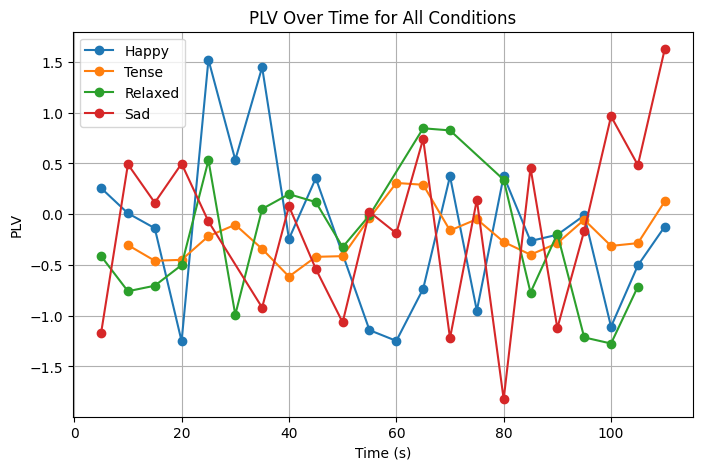

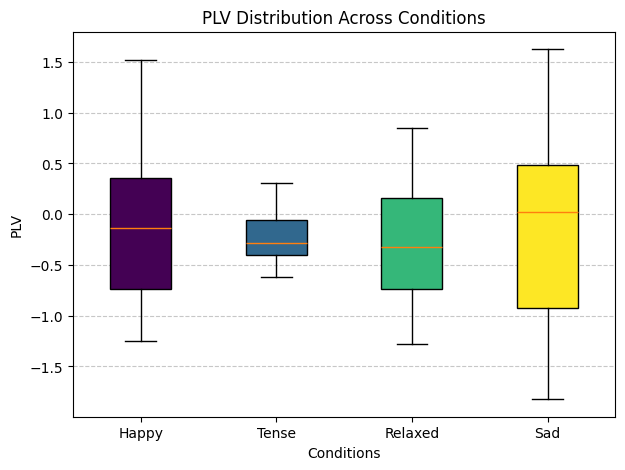

In [ ]:
# Implement PLV

def compute_plv(signal_data, fs, window_duration=10, overlap=0.5):
    """
    Computes the Phase Locking Value (PLV) over a sliding window.
    
    Parameters:
    - signal_data (array): 1D NumPy array of EEG data.
    - fs (int): Sampling frequency.
    - window_size (float): Window size in seconds.
    - overlap (float): Overlap fraction (e.g., 0.5 for 50% overlap).
    - band (tuple): Frequency band for filtering (default Alpha 8-12 Hz).
    
    Returns:
    - time_points (array): Corresponding time points for PLV values.
    - plv_values (array): PLV values for each time window.
    """
    # Filter the signal in the desired frequency band
    filtered_signal = apply_filters(signal_data, bandpass_range=(30,50),fs=fs)

    # Compute the analytic signal (Hilbert Transform)
    analytic_signal = signal.hilbert(filtered_signal)
    phase_data = np.angle(analytic_signal)  # Extract phase

    # Define windowing parameters
    window_size = int(fs * window_duration)
    steps = np.arange(0, int(len(phase_data) - window_size), int(window_size - window_size * overlap))

    # Extract epochs and compute PLV
    epochs = np.array([phase_data[idx:idx + window_size] for idx in steps])
    plv_values = np.abs(np.mean(np.exp(1j * epochs), axis=1))

    # Compute center time points for each window
    time_points = (steps + window_size / 2) / fs

    # Normalize PLV values (z-score normalization)
    plv_values = stats.zscore(plv_values)

    # Remove outliers (threshold: + & - 2 standard deviations)
    valid_indices = np.abs(plv_values) < 2  # Keep values within 2 std deviations
    return time_points[valid_indices], plv_values[valid_indices]

def plot_plv_all(time_points_dict, plv_values_dict):
    """
    Plots PLV values for all conditions on a single plot.
    
    Parameters:
    - time_points_dict (dict): Dictionary where keys are conditions and values are time points.
    - plv_values_dict (dict): Dictionary where keys are conditions and values are PLV values.
    """
    plt.figure(figsize=(8, 5))

    for condition in time_points_dict:
        plt.plot(time_points_dict[condition], plv_values_dict[condition], marker="o", linestyle="-", label=condition)

    plt.xlabel("Time (s)")
    plt.ylabel("PLV")
    plt.title("PLV Over Time for All Conditions")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_plv_box(plv_values_dict):
    """
    Creates a box plot to compare PLV distributions across conditions using the Viridis colormap.
    
    Parameters:
    - plv_values_dict (dict): Dictionary where keys are conditions and values are PLV values.
    """
    plt.figure(figsize=(7, 5))

    # Generate colors using the viridis colormap
    cmap = cm.viridis  # Colormap
    colors = cmap(np.linspace(0, 1, len(plv_values_dict)))  # Generate distinct colors

    # Create boxplot with colored boxes
    box = plt.boxplot(plv_values_dict.values(), patch_artist=True, tick_labels=plv_values_dict.keys())

    # Apply viridis colors to each box
    for patch, color in zip(box['boxes'], colors):
        patch.set_facecolor(color)

    plt.xlabel("Conditions")
    plt.ylabel("PLV")
    plt.title("PLV Distribution Across Conditions")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    plt.show()

# Sampling rate
fs = 200  


plv_results = {}
time_points_dict = {}
plv_values_dict = {}

for condition, signal_data in jenny_data.items():
    time_pts, plv_vals = compute_plv(signal_data, fs)
    time_points_dict[condition] = time_pts
    plv_values_dict[condition] = plv_vals

# Plot all conditions on one time series plot
plot_plv_all(time_points_dict, plv_values_dict)

# Plot PLV distribution as a box plot
plot_plv_box(plv_values_dict)